# **Workshop 5**

In this workshop, you'll looking at evaluation metrics and hyperparameter turning.

# 0) Loading Data and Libraries

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
# we're using the Diabetes dataset from sklearn.datasets
from sklearn import datasets
# Remember you have to run this cell block before continuing!

# set a seed for reproducibility
random_seed = 25
np.random.seed(random_seed)

# 1) Evaluation Metrics

## 1.1) Meet the Metrics (Follow)

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# This is a dummy dataset that contains 500 positive and 500 negative samples
X,Y = make_classification(n_samples=1000,n_features=4,flip_y=0,random_state=random_seed)

test_data_fraction = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_data_fraction,  random_state=random_seed)

In [3]:
from sklearn.tree import DecisionTreeClassifier
Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)

In [4]:
print(f'Accuracy: {sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)}')
print(f'Precision Macro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="macro")}')
print(f'Recall Macro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="macro")}')
print(f'F1 Macro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="macro") }')

Accuracy: 0.92
Precision Macro: 0.9184393588063313
Recall Macro: 0.9201336167628302
F1 Macro: 0.9191919191919192


In [5]:
# Since the datset is balanced in term of class distribution, all of the micro scores are the same as the accuracy
print(f'Precision Micro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="micro")}')
print(f'Recall Micro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="micro")}')
print(f'F1 Micro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="micro") }')

Precision Micro: 0.92
Recall Micro: 0.92
F1 Micro: 0.92


Sklearn also has a [built in function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that will give a handy summary of all the popular classification metrics. You can use this for the later questions.

Precision, Recall and F1 are reported for **each class separately**. For the "0" row, a 0 is treated as the positive class. For the "1" row, the 1 is treated as the positive class. This is helpful because Precision and Recall are both sensitive to which class is considered positive. **Support** is the number of instances of both classes.

In [6]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_test_predicted,digits=4))

              precision    recall  f1-score   support

           0     0.9358    0.9189    0.9273       111
           1     0.9011    0.9213    0.9111        89

    accuracy                         0.9200       200
   macro avg     0.9184    0.9201    0.9192       200
weighted avg     0.9203    0.9200    0.9201       200



Next, let's compare some classifiers. Soon you'll learn about the K-nearest-neighbors and Adaboost classifiers. For now, all you need to know is that they're very different appraoches than decision tress, and you should expect them to have different perforamnce.

In [7]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
Y_test_predicted = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=Y_train).predict(X_test)
print("KNN Classifer")
print(classification_report(Y_test,Y_test_predicted,digits=4))

KNN Classifer
              precision    recall  f1-score   support

           0     0.9907    0.9550    0.9725       111
           1     0.9462    0.9888    0.9670        89

    accuracy                         0.9700       200
   macro avg     0.9684    0.9719    0.9698       200
weighted avg     0.9709    0.9700    0.9701       200



In [8]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
Y_test_predicted = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Adaboost Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Adaboost Classifier
              precision    recall  f1-score   support

           0     0.9537    0.9279    0.9406       111
           1     0.9130    0.9438    0.9282        89

    accuracy                         0.9350       200
   macro avg     0.9334    0.9359    0.9344       200
weighted avg     0.9356    0.9350    0.9351       200



A *dummy classifier* always picks the majority. We use the to make sure a classifier is doing better than a naive approach that wouldn't require any real training (classifiers don't always do better!).

What do the precision, recall and accuracy represent in this case?

In [9]:
# Dummy Classifier (Picks the majority class. Every time.)
from sklearn.dummy import DummyClassifier
Y_test_predicted = DummyClassifier(strategy="most_frequent", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Dummy Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Dummy Classifier
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       111
           1     0.4450    1.0000    0.6159        89

    accuracy                         0.4450       200
   macro avg     0.2225    0.5000    0.3080       200
weighted avg     0.1980    0.4450    0.2741       200



/Users/sethsurber/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sethsurber/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sethsurber/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now, let's compare the classifiers. Which is the best? What metric are you using to compare them?

## 1.2) Imbalanced data (Group)
In this problem, you'll be trying to predict the presence of breast cancer from various features from medical readings. This can help doctors make better diagnoses and save lives.

Breast cancer is a common canncer, but relatively rare overall. However, this dataset includes more positive instances (people with breast cancer) than negative. Why might that be the case?

In this problem, we'll learn how to deal with these "imballanced" datasets.

In [10]:
# Load the data
# Read the breast cancer prediction dataset
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

bc_sk = datasets.load_breast_cancer()

# Make sure data is in the same range
bc_sk.data = MinMaxScaler().fit_transform(bc_sk.data)

# Note that the "target" attribute is species, represented as an integer
bc_data = pd.DataFrame(data= np.c_[bc_sk['data'], bc_sk['target']],columns= list(bc_sk['feature_names'])+['target'])
bc_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


In [11]:
test_data_fraction = 0.2
bc_features = bc_data.iloc[:,0:-1]
bc_labels = bc_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(bc_features, bc_labels, test_size=test_data_fraction,  random_state=random_seed)

Let's take a look at the ratio of class values in the dataset.

In [12]:
bc_data["target"].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

As we can see, it's around a 60/40 split. What effect do you think this will have on the various evaluation metrics? For example, how could a classifier easily get 100% recall, 60% accuracy and 60% precision?

**Answer Here**

Now run the evaluation metrics as like above for Decision Trees, KNN, Adaboost, and the Dummy Classifier.

In [13]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)

In [14]:
print(f'Accuracy: {sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)}')
print(f'Precision Macro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="macro")}')
print(f'Recall Macro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="macro")}')
print(f'F1 Macro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="macro") }')

Accuracy: 0.9210526315789473
Precision Macro: 0.9198717948717949
Recall Macro: 0.9030769230769231
F1 Macro: 0.9105882352941176


In [15]:
print(f'Precision Micro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="micro")}')
print(f'Recall Micro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="micro")}')
print(f'F1 Micro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="micro") }')

Precision Micro: 0.9210526315789473
Recall Micro: 0.9210526315789473
F1 Micro: 0.9210526315789473


In [16]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
Y_test_predicted = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=Y_train).predict(X_test)
print("KNN Classifer")
print(classification_report(Y_test,Y_test_predicted,digits=4))

KNN Classifer
              precision    recall  f1-score   support

         0.0     1.0000    0.8718    0.9315        39
         1.0     0.9375    1.0000    0.9677        75

    accuracy                         0.9561       114
   macro avg     0.9688    0.9359    0.9496       114
weighted avg     0.9589    0.9561    0.9553       114



In [17]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
Y_test_predicted = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Adaboost Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Adaboost Classifier
              precision    recall  f1-score   support

         0.0     0.9714    0.8718    0.9189        39
         1.0     0.9367    0.9867    0.9610        75

    accuracy                         0.9474       114
   macro avg     0.9541    0.9292    0.9400       114
weighted avg     0.9486    0.9474    0.9466       114



In [18]:
# Dummy Classifier
from sklearn.dummy import DummyClassifier
Y_test_predicted = DummyClassifier(strategy="most_frequent", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Dummy Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Dummy Classifier
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        39
         1.0     0.6579    1.0000    0.7937        75

    accuracy                         0.6579       114
   macro avg     0.3289    0.5000    0.3968       114
weighted avg     0.4328    0.6579    0.5221       114



/Users/sethsurber/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sethsurber/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sethsurber/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on these metrics, answer the following questions:

1. Which model would you select and why? 
2. What metric(s) are most important for the breast cancer classification problem?
3. How would you recommend a doctor actually use the model **in practice**? Is it good enough to make decisions on its own?

**Answer here**

## 1.3) Multiclass Data (Group)

Now, we'll be looking at the wine dataset.

In [19]:
# Read the iris dataset and translate to pandas dataframe
wine_sk = datasets.load_wine()
# Note that the "target" attribute is species, represented as an integer
wine_data = pd.DataFrame(data= np.c_[wine_sk['data'], wine_sk['target']],columns= wine_sk['feature_names'] + ['target'])

In [20]:
from sklearn.model_selection import train_test_split
# The fraction of data that will be test data
test_data_fraction = 0.90

wine_features = wine_data.iloc[:,0:-1]
wine_labels = wine_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(wine_features, wine_labels, test_size=test_data_fraction,  random_state=random_seed)

Let's check the distribution of the dataset

In [21]:
wine_data["target"].value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

The classes are represented as numbers. This is just shorthand to make it easier to classify.

The [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) is useful for getting a broad overview of how your classifier handled certain classes. Below, create a confusion matrix using the **test set**.

In [22]:
from sklearn.metrics import confusion_matrix

# Now create a confusion matrix

Read the documentation for `confusion_matrix`. How many instances were predicted to be class 0 but were actually class 1?

**Answer here**

Now run the evaluation metrics as like above for Decision Trees, KNN, Adaboost, and the Dummy Classifier.

In [23]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)

In [24]:
print(f'Accuracy: {sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)}')
print(f'Precision Macro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="macro")}')
print(f'Recall Macro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="macro")}')
print(f'F1 Macro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="macro") }')

Accuracy: 0.6894409937888198
Precision Macro: 0.7228487886382623
Recall Macro: 0.7010051169590644
F1 Macro: 0.700883575883576


In [25]:
print(f'Precision Micro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="micro")}')
print(f'Recall Micro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="micro")}')
print(f'F1 Micro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="micro") }')

Precision Micro: 0.6894409937888198
Recall Micro: 0.6894409937888198
F1 Micro: 0.6894409937888198


In [26]:
#cm = confusion_matrix(Y_test, Y_test_predicted, labels=None)
#cm

[0. 1. 2.]
[[26 31  0]
 [ 9 51  4]
 [ 4  2 34]]


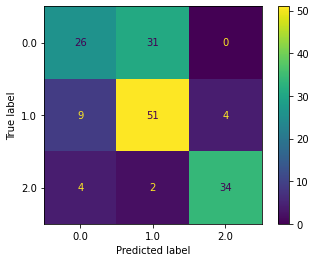

In [27]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(np.unique(wine_labels))
cm = confusion_matrix(Y_test, Y_test_predicted, labels=np.unique(wine_labels))
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(wine_labels))
disp.plot()
plt.show()

In [28]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
Y_test_predicted = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=Y_train).predict(X_test)
print("KNN Classifer")
print(classification_report(Y_test,Y_test_predicted,digits=4))

KNN Classifer
              precision    recall  f1-score   support

         0.0     0.8889    0.8421    0.8649        57
         1.0     0.5070    0.5625    0.5333        64
         2.0     0.3333    0.3000    0.3158        40

    accuracy                         0.5963       161
   macro avg     0.5764    0.5682    0.5713       161
weighted avg     0.5991    0.5963    0.5967       161



In [29]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
Y_test_predicted = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Adaboost Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Adaboost Classifier
              precision    recall  f1-score   support

         0.0     0.9600    0.4211    0.5854        57
         1.0     0.6146    0.9219    0.7375        64
         2.0     0.9000    0.9000    0.9000        40

    accuracy                         0.7391       161
   macro avg     0.8249    0.7476    0.7410       161
weighted avg     0.8078    0.7391    0.7240       161



In [30]:
# Dummy Classifier
from sklearn.dummy import DummyClassifier
Y_test_predicted = DummyClassifier(strategy="most_frequent", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Dummy Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Dummy Classifier
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        57
         1.0     0.0000    0.0000    0.0000        64
         2.0     0.2484    1.0000    0.3980        40

    accuracy                         0.2484       161
   macro avg     0.0828    0.3333    0.1327       161
weighted avg     0.0617    0.2484    0.0989       161



/Users/sethsurber/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sethsurber/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sethsurber/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Answer the following questions below:

1. Which model would you select if you cared equally about each class being correct? 
2. What if you cared most about accurately detecting Class 0? 
3. Would you ever choose the Decision Tree model over Adaboost? If so, when? If not, why not?

**Answer here**

# 2) Cross Validation and Hyperparmeter Tuning

## 2.1) Basic Cross Validation (Follow)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [32]:
# Initialize a k-fold splitter
kf = KFold(n_splits=3)

In [33]:
# Kf.split() allows you to iterate though the different folds
# "train_index" are the indecies of the training data in that fold
# "test_index" are the indicies of the testing data in that fold
for train_index, test_index in kf.split(X_train):
    print("Train: ", train_index)
    print("Test: ", test_index)
    print("----")

Train:  [ 6  7  8  9 10 11 12 13 14 15 16]
Test:  [0 1 2 3 4 5]
----
Train:  [ 0  1  2  3  4  5 12 13 14 15 16]
Test:  [ 6  7  8  9 10 11]
----
Train:  [ 0  1  2  3  4  5  6  7  8  9 10 11]
Test:  [12 13 14 15 16]
----


## 2.2) Hyperparameter Tuning with CV (Follow)

We did some very basic HP Tuning last workshop. However, one of the main issues is that we did HP tuning by testing our HPs againt the test dataset. It's good practice not to touch your dataset at all until you've finished selecting your model completly. Therefore, in this exercise we'll be trying out different HPs by constructing validation sets from our training data.

The dataset we'll be using for this exercise is the breast cancer dataset, which is used to tell if a certain individal might have breast cancer or not.

In [34]:
# Load the data
# Read the wine dataset and translate to pandas dataframe
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

bc_sk = datasets.load_breast_cancer()

# Make sure data is in the same range
bc_sk.data = MinMaxScaler().fit_transform(bc_sk.data)

# Note that the "target" attribute is species, represented as an integer
bc_data = pd.DataFrame(data= np.c_[bc_sk['data'], bc_sk['target']],columns= list(bc_sk['feature_names'])+['target'])
bc_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


In [57]:
# Formatting our data
test_data_fraction = 0.2
bc_features = bc_data.iloc[:,0:-1]
bc_labels = bc_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(bc_features, bc_labels, test_size=test_data_fraction,  random_state=random_seed)

In [58]:
def k_fold_accuracy(k, model, X_data, Y_data):
    
    # Init k-fold splitter
    kf = KFold(n_splits=k)
    scores = []
 
    for train_index, test_index in kf.split(X_train):
        
        # Splits the given data into a training/validation set
        k_X_train, k_X_valid = X_data.iloc[train_index], X_data.iloc[test_index]
        k_Y_train, k_Y_valid = Y_data.iloc[train_index], Y_data.iloc[test_index]

        # Fits and runs the model
        model_fit = model.fit(X=k_X_train, y=k_Y_train)
        k_Y_valid_predicted=model_fit.predict(k_X_valid)

        acc_score = sklearn.metrics.accuracy_score(k_Y_valid, k_Y_valid_predicted)
        scores.append(acc_score)
    # END SOLUTION

    return scores

In [54]:
# Testing K-fold
k = 3
model = DecisionTreeClassifier(criterion = "gini", random_state=random_seed)
per_fold_acc = k_fold_accuracy(k, model, X_train, Y_train)
print(per_fold_acc)
np.mean(per_fold_acc)

[0.9539473684210527, 0.9605263157894737, 0.9205298013245033]


0.9450011618450098

There also exists a built in sklearn function for this, however it is import to know how to perform your own k-fold cross validation split if you want to implement a custom evaluation metric.

In [59]:
from sklearn import metrics
# We're using the trianing dataset here, but remember that CV will
# split that data into training and validation sets for each fold
# so we get an "unbiased" estimate of our test performance.
per_fold_acc = cross_val_score(model, X_train, Y_train, cv=KFold(n_splits=k), scoring='accuracy')
print(per_fold_acc)
np.mean(per_fold_acc)

[0.92307692 0.93406593 0.96703297 0.92307692 0.92307692]


0.9340659340659341

*Why would we ever do this by hand, if there's already a built-in method?* 

Sometimes our model training process is more complex than just fitting the model. For example, we may want to do:
* Feature selection
* Normalization / scaling
* More complex models not in the sklearn library

In these cases, we can still *only use our training data*! You can't use test data to select features - that would be "cheating." So everying that you use your training data for has to occur within the loop we wrote for CV, above, based on the training data for the particular fold we're evaluating.

## 2.3 Tuning (Group)

In this problem you are going to select the best hypterparameter, using *only the training dataset*. No peaking at the test dataset. To estimate how well a given hyperparameter value will do on *unseen* data, we can use Crossvalidation (within the training dataset) to evaluate our model.

Let's use this approach to select the best `ccp_alpha` hyperparameter for a Decision Tree model.

You should:
1. Iterate over all ccp_alpha values
2. Calculate the k_fold validation accuracy using the above funciton
3. Calculate the training accuracy and the validation accuracy
4. Plot both accuracies vs. the ccp_alpha value

Text(0, 0.5, 'Average Accuracy of 5-fold validation')

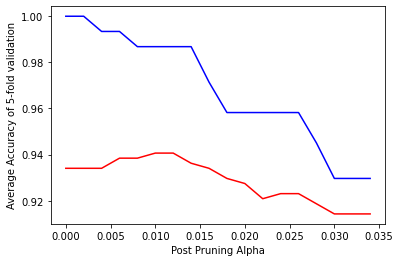

In [60]:
from sklearn.metrics import accuracy_score

# np.arange generates a list that starts at minimum, ends at maximum, and increments by step
alpha_values = np.arange(0, 0.035, 0.002)

# two lists to hold our accuracy
k = 5
valid_accs = []
train_accs = []

# Put your solution here!
for ccp_alpha in alpha_values:
    # at every ccp_alpha value, get the training and test accuracy
    model = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=ccp_alpha)
    valid_acc = np.mean(k_fold_accuracy(k, model, X_train, Y_train))
    valid_accs.append(valid_acc)
    train_accs.append(accuracy_score(Y_train, model.fit(X_train, Y_train).predict(X_train)))

#plt.plot(alpha_values, train_acc_list, color='blue')
plt.plot(alpha_values, valid_accs, color='red')
plt.plot(alpha_values, train_accs, color='blue')
plt.xlabel("Post Pruning Alpha")
plt.ylabel(f'Average Accuracy of {k}-fold validation')


optimapl alph between .010 - 0.012

The following code selects the alpha value for the best model. Then you job is to train a new model (using all of the training data), using your best hyperparameter value. Then evaluate it on the test dataset. What is the accuracy, precision, recall and F1 Score?

In [61]:
# Take the alpha for the model with the best accuracy on the *validation* set!
best_alpha = alpha_values[np.argmax(valid_accs)]
best_alpha

0.01

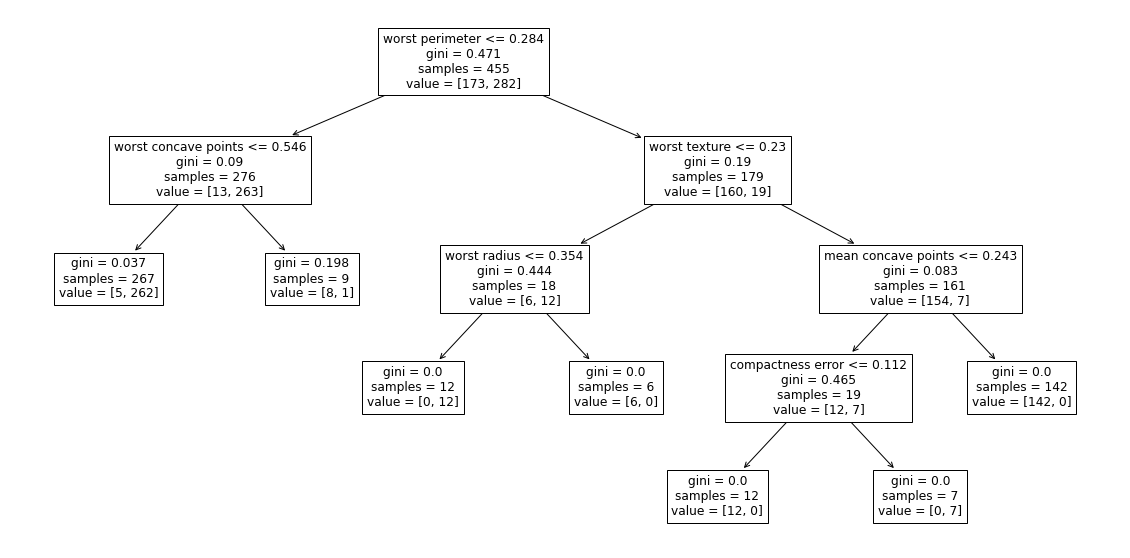

In [62]:
# Train your model here. You may want to print the tree using plot_tree
from sklearn.tree import plot_tree
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=best_alpha).fit(X=X_train, y=Y_train)

plt.figure(figsize=(20,10))
_ = plot_tree(gini_tree, feature_names=bc_features.columns)

In [63]:
# Now evaluate your model on the test dataset.
# How does it perform compared your model from the last workshop that didn't use CV?
Y_test_predicted = gini_tree.predict(X_test)
sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)

0.9385964912280702

# 3) ROC Curves

Sklearn has some built in methods for [plotting ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html).

### 3.1) Plotting ROC Curves (Follow)

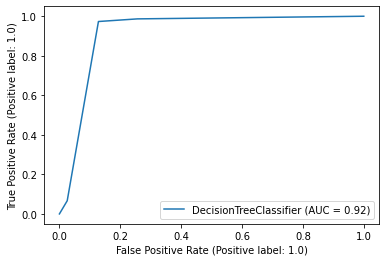

In [64]:
# First make an ROC curve for the model you selected with HP tuning
gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=best_alpha).fit(X=X_train, y=Y_train)
metrics.plot_roc_curve(gini_tree,X_test,Y_test)

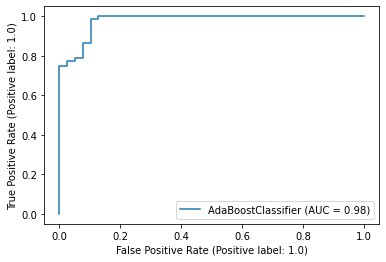

In [65]:
# Now, make an ROC curve with an AdaBoostClassifier with n_estimators=100
ada = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train)
metrics.plot_roc_curve(ada, X_test, Y_test)

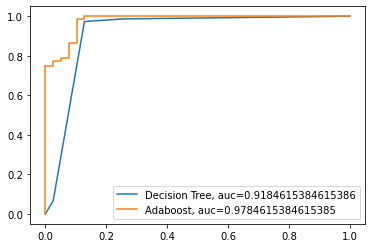

In [66]:
plt.figure(0).clf()

# When predicting, we have to ask for *continuous* values, not 0/1, so we use predict_proba
# We use [:,1] to get the predictions for the positive class
tree_predictions = gini_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresh = metrics.roc_curve(Y_test, tree_predictions)
auc = metrics.roc_auc_score(Y_test, tree_predictions)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))

adaboost_predictions = ada.predict_proba(X_test)[:,1]
fpr, tpr, thresh = metrics.roc_curve(Y_test, adaboost_predictions)
auc = metrics.roc_auc_score(Y_test, adaboost_predictions)
plt.plot(fpr,tpr,label="Adaboost, auc="+str(auc))

plt.legend(loc=0)

### 3.2) Intepreting ROC curves (Group)

Take a look at the above ROC curves. How are they similar? How do they differ? Is one strictly better than the other? In what situations is one better than the other? Discuss with your group.

AUC 0.98 is closer to 1
and the value is 0.0 goes higher. so use the ada model.

**Take notes of your discussion here.**